# Exploring Semantic Similarity in ISL_CLSRT Dataset using Sentence Embeddings

This notebook dives into the world of sentence embeddings to understand the semantic relationships between cleaned gloss sentences from the ISL_CLSRT dataset. We will leverage the `sentence-transformers` library with a light-weight model like BERT-tiny to:

1. Generate numerical representations (embeddings) for each gloss sentence.
2. Compute the pairwise cosine similarity between these embeddings to quantify their semantic relatedness.
3. Visualize the similarity matrix to identify clusters of semantically similar glosses.

This analysis can be valuable for tasks like identifying potential synonyms, discovering paraphrases, and improving search or retrieval within the ISL_CLSRT corpus.


In [ ]:
!pip install sentence-transformers scikit-learn pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 865.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 904.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ✅ Colab Setup
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/IETGenAI-SLT/Chapter 4/isl_train_meta.csv')
df.head()

,Sentences,File location,gloss_sequence,signer_id,sample_id
0,it does not make any difference to me,ISL_CSLRT_Corpus\Videos_Sentence_Level\it does...,IT MAKE ANY DIFFERENCE ME DO NOT,6,ISL_0278_S6
1,tell me truth,ISL_CSLRT_Corpus\Videos_Sentence_Level\tell me...,TELL TRUTH,6,ISL_0341_S6
2,do me a favour,ISL_CSLRT_Corpus\Videos_Sentence_Level\do me a...,DO FAVOUR ME,4,ISL_0046_S4
3,do not worry,ISL_CSLRT_Corpus\Videos_Sentence_Level\do not ...,DONOT WORRY,4,ISL_0065_S4
4,do not abuse him,ISL_CSLRT_Corpus\Videos_Sentence_Level\do not ...,HIM ABUSE DONOT,5,ISL_0048_S5


In [4]:
# Load pre-cleaned ISL_CLSRT data
df = pd.read_csv('/content/drive/MyDrive/IETGenAI-SLT/Chapter 4/isl_train_meta_cleaned.csv')
df[['Sentences', 'cleaned_gloss']].head()


,Sentences,cleaned_gloss
0,it does not make any difference to me,MAKE DIFFERENCE
1,tell me truth,TELL TRUTH
2,do me a favour,FAVOUR
3,do not worry,WORRY
4,do not abuse him,ABUSE


## Step 1: Initialize Sentence Transformer Model

We use `all-MiniLM-L6-v2` or `bert-tiny` for a light-weight embedding extraction.


In [5]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Step 2: Generate Sentence Embeddings


In [6]:
sentences = df['cleaned_gloss'].dropna().tolist()
embeddings = model.encode(sentences, show_progress_bar=True)

Batches:   0%|          | 0/15 [00:00<?, ?it/s]

## Step 3: Compute Pairwise Cosine Similarity


In [7]:
similarity_matrix = cosine_similarity(embeddings)
similarity_df = pd.DataFrame(similarity_matrix, index=sentences, columns=sentences)
similarity_df.iloc[:5, :5]

,MAKE DIFFERENCE,TELL TRUTH,FAVOUR,WORRY,ABUSE
MAKE DIFFERENCE,1.000000,0.318884,0.312121,0.243322,0.262704
TELL TRUTH,0.318884,1.000000,0.203021,0.290941,0.240905
FAVOUR,0.312121,0.203021,1.000000,0.319996,0.361644
WORRY,0.243322,0.290941,0.319996,1.000000,0.292675
ABUSE,0.262704,0.240905,0.361644,0.292675,1.000000


## Step 4: Visualize Similarity Matrix (Heatmap)


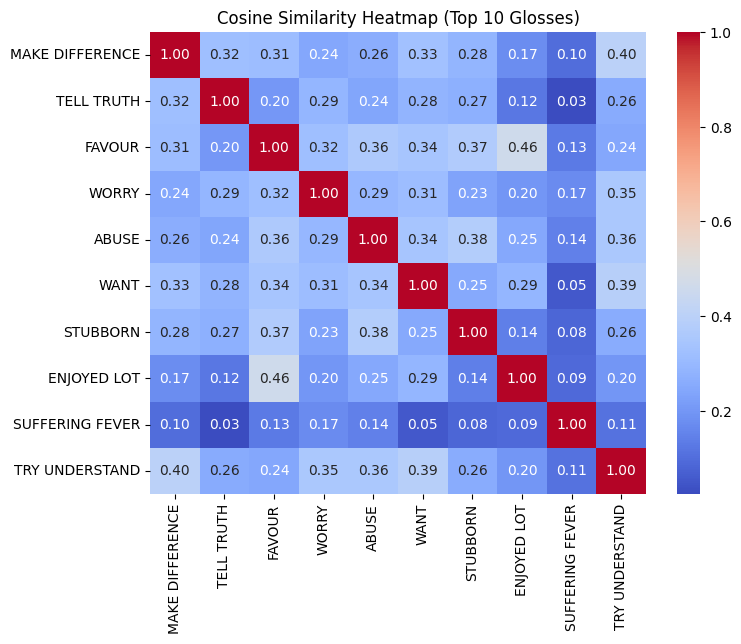

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(similarity_df.iloc[:10, :10], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cosine Similarity Heatmap (Top 10 Glosses)")
plt.show()


### Summary
This notebook demonstrated how to compute semantic similarity between gloss sentences using sentence embeddings. Such techniques are useful for duplicate detection, glossary alignment, and synonym discovery in sign language corpora.


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load pre-cleaned ISL_CLSRT data
df = pd.read_csv('/content/drive/MyDrive/IETGenAI-SLT/Chapter 4/isl_train_meta_cleaned.csv')

# Initialize Sentence Transformer Model
# We use 'all-MiniLM-L6-v2' or 'bert-tiny' for a light-weight embedding extraction.
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Generate Sentence Embeddings
sentences = df['cleaned_gloss'].dropna().tolist()
embeddings = model.encode(sentences, show_progress_bar=True)

# Compute Pairwise Cosine Similarity
similarity_matrix = cosine_similarity(embeddings)
similarity_df = pd.DataFrame(similarity_matrix, index=sentences, columns=sentences)

# Visualize Similarity Matrix (Heatmap)
plt.figure(figsize=(8,6))
sns.heatmap(similarity_df.iloc[:10, :10], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cosine Similarity Heatmap (Top 10 Glosses)")
plt.show()